# Data

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from skimage.color import  rgb2gray, lab2rgb, rgb2lab

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
# from keras.layers import Activation, Dense, Dropout, Flatten

from keras.optimizers import Adam
from skimage.transform import resize
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import Input
from keras.models import  Model

from keras.optimizers import Adam


### Loading datasets

In [ ]:
# color = np.load('/kaggle/working/color.npy')
# gray = np.load('/kaggle/working/gray.npy')
ab = np.load('/kaggle/input/portret-dataset-128/ab_20000_128.npy')[:10000]
L = np.load('/kaggle/input/portret-dataset-128/L_20000_128.npy')[:10000]

### Splitting data

In [ ]:
gray_train, gray_test, color_train, color_test = train_test_split(L, ab, test_size=0.2, random_state=54)
# gray_test, gray_validation, color_test, color_validation = train_test_split(gray_test, color_test, test_size=0.5, random_state=54)

In [ ]:
print(gray_train.shape)
print(gray_test.shape)
# print(gray_validation.shape)

(8000, 128, 128, 1)
(2000, 128, 128, 1)


In [ ]:
color_train.shape

(8000, 128, 128, 2)

# Autoencoder model

## Definition of the model

In [ ]:
encoder_input = Input(shape=(128, 128, 1))

#Encoder
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(encoder_input)
encoder_output = BatchNormalization()(encoder_output)
encoder_output = MaxPooling2D((2, 2),  padding='same', strides = 2,)(encoder_input)

encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = BatchNormalization()(encoder_output)
encoder_output = MaxPooling2D((2, 2), padding='same', strides = 2,)(encoder_input)

encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = BatchNormalization()(encoder_output)
encoder_output = MaxPooling2D((2, 2), padding='same', strides = 2,)(encoder_input)

encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
# print(encoder_input.shape)
encoder_output = BatchNormalization()(encoder_output)
encoder_output = MaxPooling2D((2, 2), padding='same', strides = 2,)(encoder_input)
# print(encoder_input.shape)


#Decoder
decoder_output = Conv2DTranspose(512, (3,3), activation='relu', padding='same', strides = 2)(encoder_output)
print(decoder_output.shape)
decoder_output = BatchNormalization()(decoder_output)
print(decoder_output.shape)
decoder_output = Conv2DTranspose(256, (3,3), activation='relu', padding='same', strides = 2)(encoder_output)
print(decoder_output.shape)
decoder_output = BatchNormalization()(decoder_output)
print(decoder_output.shape)

decoder_output = Conv2DTranspose(128, (3,3), activation='relu', padding='same', strides = 2)(encoder_output)
# print(decoder_output.shape)
decoder_output = BatchNormalization()(decoder_output)
# print(decoder_output.shape)

decoder_output = Conv2DTranspose(64, (3,3), activation='relu', padding='same', strides = 2)(encoder_output)
decoder_output = BatchNormalization()(decoder_output)
print(decoder_output.shape)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same') (decoder_output)
print(decoder_output.shape)

# print(decoder_output.shape)


(None, 128, 128, 512)
(None, 128, 128, 512)
(None, 128, 128, 256)
(None, 128, 128, 256)
(None, 128, 128, 64)
(None, 128, 128, 2)


In [ ]:
L_train, L_test, ab_train, ab_test = train_test_split(L, ab, test_size=0.2, random_state=54)

In [ ]:
model = Model(encoder_input, decoder_output)
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(L_train,
         (ab_train / 128),
         epochs = 50,
          batch_size = 32)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0091
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0090
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0093
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0088
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0091
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0088
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0088
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0087
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0090
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0085
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0088
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0085
Epoch 13/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0084
Epoch 14/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0088
Epoch 15/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s

In [ ]:
output = model.predict(L_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
Lab_pred = np.concatenate((L_test, output * 128), axis=-1)
RGB_pred = lab2rgb(Lab_pred)
Lab = np.concatenate((L_test, ab_test), axis=-1)
RGB = lab2rgb(Lab)

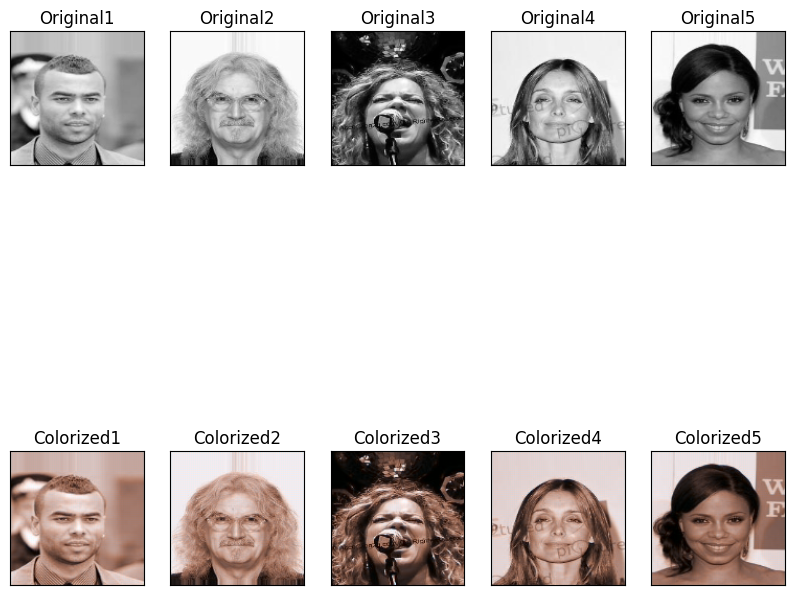

In [ ]:

shift_image = 20
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(L_test[i + shift_image], cmap = 'gray')
    # plt.axis('off')
    plt.title('Original{}'.format(i + 1))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 5, i + 5 + 1)
    plt.imshow(RGB_pred[i + shift_image])
    # plt.axis('off')
    plt.title('Colorized{}'.format(i + 1))
    plt.xticks([])
    plt.yticks([])

plt.show()